# PART 2: Data Visualization and Analysis

In [26]:
#!python -m pip install -U pip
#!python -m pip install -U matplotlib
#!python -m pip install -U sklearn

In [27]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

## Working with UFC&Event Data

In [28]:
# Import data
ufc_event_data = pd.read_csv("data_files/ufc&event_info.csv")
ufc_event_data

,Unnamed: 0,Event ID,Date,Short Name,Name,Date Time,Red Fighter Name,Blue Fighter Name,American Odd that Red Fighter Will Win,American Odd that Blue Fighter Will Win,...,Blue Significant Strikes Landed/min,Blue Significant Striking Accuracy,Blue Average Submissions Attempted/15min,Blue Average Takedowns Landed/15min,Blue Takedown Accuracy,Red Significant Strikes Landed/min,Red Significant Striking Accuracy,Red Average Submissions Attempted/15min,Red Average Takedowns Landed/15min,Red Takedown Accuracy
0,0,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Jon Jones,Dominick Reyes,-460.0,365.0,...,5.03,0.52,0.4,0.39,0.16,4.31,0.57,0.5,1.90,0.46
1,1,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Valentina Shevchenko,Katlyn Chookagian,-920.0,610.0,...,4.35,0.32,0.1,0.00,0.00,3.02,0.49,0.4,1.94,0.51
2,2,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Juan Adams,Justin Tafa,-240.0,200.0,...,2.77,0.66,0.0,0.00,0.00,7.32,0.55,0.0,0.97,0.66
3,3,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Mirsad Bektic,Dan Ige,-125.0,105.0,...,4.15,0.49,1.0,2.73,0.34,2.88,0.42,0.4,3.38,0.53
4,4,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Derrick Lewis,Ilir Latifi,-225.0,185.0,...,2.29,0.40,0.5,1.85,0.30,2.63,0.49,0.0,0.52,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,363,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Giga Chikadze,Jamey Simmons,-835.0,525.0,...,0.00,0.00,0.0,0.00,0.00,3.52,0.43,0.0,0.40,0.40
364,364,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Alexandr Romanov,Marcos Rogerio de Lima,-455.0,330.0,...,3.78,0.54,0.8,0.76,0.60,5.87,0.37,3.2,6.41,1.00
365,365,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Darren Elkins,Eduardo Garagorri,-240.0,185.0,...,3.75,0.54,0.0,0.79,1.00,3.54,0.37,1.2,2.43,0.33
366,366,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Max Griffin,Ramiz Brahimaj,-143.0,115.0,...,0.00,0.00,0.0,0.00,0.00,3.87,0.49,0.5,1.90,0.55


In [29]:
# 2020/7/11, event id 121, first match day with COVID
# Remove unnecessary column
del ufc_event_data["Unnamed: 0"]

In [30]:
# Create a new column to hold pre/during COVID label
ufc_event_data["Pre/During COVID"] = ""
# Move it to the front
column_name = "Pre/During COVID"
first_column = ufc_event_data.pop(column_name)
ufc_event_data.insert(0,column_name,first_column)
ufc_event_data.head()

,Pre/During COVID,Event ID,Date,Short Name,Name,Date Time,Red Fighter Name,Blue Fighter Name,American Odd that Red Fighter Will Win,American Odd that Blue Fighter Will Win,...,Blue Significant Strikes Landed/min,Blue Significant Striking Accuracy,Blue Average Submissions Attempted/15min,Blue Average Takedowns Landed/15min,Blue Takedown Accuracy,Red Significant Strikes Landed/min,Red Significant Striking Accuracy,Red Average Submissions Attempted/15min,Red Average Takedowns Landed/15min,Red Takedown Accuracy
0,,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Jon Jones,Dominick Reyes,-460.0,365.0,...,5.03,0.52,0.4,0.39,0.16,4.31,0.57,0.5,1.90,0.46
1,,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Valentina Shevchenko,Katlyn Chookagian,-920.0,610.0,...,4.35,0.32,0.1,0.00,0.00,3.02,0.49,0.4,1.94,0.51
2,,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Juan Adams,Justin Tafa,-240.0,200.0,...,2.77,0.66,0.0,0.00,0.00,7.32,0.55,0.0,0.97,0.66
3,,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Mirsad Bektic,Dan Ige,-125.0,105.0,...,4.15,0.49,1.0,2.73,0.34,2.88,0.42,0.4,3.38,0.53
4,,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Derrick Lewis,Ilir Latifi,-225.0,185.0,...,2.29,0.40,0.5,1.85,0.30,2.63,0.49,0.0,0.52,0.25


In [31]:
# Display the list of dates
ufc_event_data["Date"].unique()

array(['2020-02-08', '2020-02-15', '2020-02-22', '2020-02-29',
       '2020-03-07', '2020-03-14', '2020-05-09', '2020-05-13',
       '2020-05-16', '2020-05-30', '2020-06-06', '2020-06-13',
       '2020-06-20', '2020-06-27', '2020-07-11', '2020-07-15',
       '2020-07-18', '2020-07-25', '2020-08-01', '2020-08-08',
       '2020-08-15', '2020-08-22', '2020-08-29', '2020-09-05',
       '2020-09-12', '2020-09-19', '2020-09-26', '2020-10-03',
       '2020-10-10', '2020-10-17', '2020-10-24', '2020-10-31',
       '2020-11-07'], dtype=object)

In [32]:
# Identify the location of 2020-07-11
rowindex = ufc_event_data.index[ufc_event_data["Date"]=='2020-07-11']
rowindex

Int64Index([160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172], dtype='int64')

In [33]:

# Label the date before 2020-07-11 with "Pre_COVID" in Pre/During COVID column
# Label the date from 2020-07-11 on with "During_COVID" in Pre/During COVID column
rowrange = list(range(159))
rowduring = list(range(160,368))
ufc_event_data.loc[rowrange, "Pre/During COVID"] = "Pre_COVID"
ufc_event_data.loc[rowduring, "Pre/During COVID"] = "During_COVID"
ufc_event_data

,Pre/During COVID,Event ID,Date,Short Name,Name,Date Time,Red Fighter Name,Blue Fighter Name,American Odd that Red Fighter Will Win,American Odd that Blue Fighter Will Win,...,Blue Significant Strikes Landed/min,Blue Significant Striking Accuracy,Blue Average Submissions Attempted/15min,Blue Average Takedowns Landed/15min,Blue Takedown Accuracy,Red Significant Strikes Landed/min,Red Significant Striking Accuracy,Red Average Submissions Attempted/15min,Red Average Takedowns Landed/15min,Red Takedown Accuracy
0,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Jon Jones,Dominick Reyes,-460.0,365.0,...,5.03,0.52,0.4,0.39,0.16,4.31,0.57,0.5,1.90,0.46
1,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Valentina Shevchenko,Katlyn Chookagian,-920.0,610.0,...,4.35,0.32,0.1,0.00,0.00,3.02,0.49,0.4,1.94,0.51
2,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Juan Adams,Justin Tafa,-240.0,200.0,...,2.77,0.66,0.0,0.00,0.00,7.32,0.55,0.0,0.97,0.66
3,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Mirsad Bektic,Dan Ige,-125.0,105.0,...,4.15,0.49,1.0,2.73,0.34,2.88,0.42,0.4,3.38,0.53
4,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Derrick Lewis,Ilir Latifi,-225.0,185.0,...,2.29,0.40,0.5,1.85,0.30,2.63,0.49,0.0,0.52,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,During_COVID,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Giga Chikadze,Jamey Simmons,-835.0,525.0,...,0.00,0.00,0.0,0.00,0.00,3.52,0.43,0.0,0.40,0.40
364,During_COVID,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Alexandr Romanov,Marcos Rogerio de Lima,-455.0,330.0,...,3.78,0.54,0.8,0.76,0.60,5.87,0.37,3.2,6.41,1.00
365,During_COVID,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Darren Elkins,Eduardo Garagorri,-240.0,185.0,...,3.75,0.54,0.0,0.79,1.00,3.54,0.37,1.2,2.43,0.33
366,During_COVID,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Max Griffin,Ramiz Brahimaj,-143.0,115.0,...,0.00,0.00,0.0,0.00,0.00,3.87,0.49,0.5,1.90,0.55


## Working with UFC Results Data

In [34]:
# Import data
ufc_result_data = pd.read_csv("data_files/UFC2020FightResults.csv")
ufc_result_data

,Unnamed: 0,W/L,FIGHTER,KD,STR,TD,SUB,WEIGHT CLASS,METHOD,ROUND,TIME
0,Pre_COVID,WIN,Jon Jones,0,104,2,0,Light Heavyweight,U-DEC,5,5:00
1,Pre_COVID,NaN,Dominick Reyes,0,116,0,0,NaN,NaN,NaN,NaN
2,Pre_COVID,WIN,Valentina Shevchenko,0,40,3,0,Women's Flyweight,KO/TKO,3,1:03
3,Pre_COVID,NaN,Katlyn Chookagian,0,17,0,0,NaN,Punches,NaN,NaN
4,Pre_COVID,WIN,Justin Tafa,1,10,0,0,Heavyweight,KO/TKO,1,1:59
...,...,...,...,...,...,...,...,...,...,...,...
758,During_COVID,NaN,Geraldo de Freitas,0,76,1,0,NaN,NaN,NaN,NaN
759,During_COVID,WIN,Alex Morono,0,176,3,0,Welterweight,U-DEC,3,5:00
760,During_COVID,NaN,Rhys McKee,0,124,0,0,NaN,NaN,NaN,NaN
761,During_COVID,WIN,Don'Tale Mayes,0,59,1,0,Heavyweight,U-DEC,3,5:00


In [35]:
renamed_result = ufc_result_data.rename(columns={"Unnamed: 0":"Pre/During COVID"})
renamed_result

,Pre/During COVID,W/L,FIGHTER,KD,STR,TD,SUB,WEIGHT CLASS,METHOD,ROUND,TIME
0,Pre_COVID,WIN,Jon Jones,0,104,2,0,Light Heavyweight,U-DEC,5,5:00
1,Pre_COVID,NaN,Dominick Reyes,0,116,0,0,NaN,NaN,NaN,NaN
2,Pre_COVID,WIN,Valentina Shevchenko,0,40,3,0,Women's Flyweight,KO/TKO,3,1:03
3,Pre_COVID,NaN,Katlyn Chookagian,0,17,0,0,NaN,Punches,NaN,NaN
4,Pre_COVID,WIN,Justin Tafa,1,10,0,0,Heavyweight,KO/TKO,1,1:59
...,...,...,...,...,...,...,...,...,...,...,...
758,During_COVID,NaN,Geraldo de Freitas,0,76,1,0,NaN,NaN,NaN,NaN
759,During_COVID,WIN,Alex Morono,0,176,3,0,Welterweight,U-DEC,3,5:00
760,During_COVID,NaN,Rhys McKee,0,124,0,0,NaN,NaN,NaN,NaN
761,During_COVID,WIN,Don'Tale Mayes,0,59,1,0,Heavyweight,U-DEC,3,5:00


In [36]:
renamed_result["METHOD"].unique()

array(['U-DEC', nan, 'KO/TKO', 'Punches', 'Punch', 'S-DEC', 'Flying Knee',
       'Overturned', 'DQ', 'SUB', 'Guillotine Choke', 'Kimura',
       'Rear Naked Choke', 'Arm Triangle', 'M-DEC', 'Knee', 'Elbow',
       'Ankle Lock', 'Knees', 'Armbar', 'Kneebar', 'Kick', "D'Arce Choke",
       'METHOD', 'Anaconda Choke', 'Heel Hook', 'Triangle Choke',
       'Spinning Back Fist', 'Elbows', 'Neck Crank', 'Spinning Back Kick',
       'Injury', 'Forearm Choke'], dtype=object)

In [37]:
# Extract and isolate pre covid data 
pre_covid = renamed_result.loc[renamed_result["Pre/During COVID"]=="Pre_COVID"]
pre_covid

,Pre/During COVID,W/L,FIGHTER,KD,STR,TD,SUB,WEIGHT CLASS,METHOD,ROUND,TIME
0,Pre_COVID,WIN,Jon Jones,0,104,2,0,Light Heavyweight,U-DEC,5,5:00
1,Pre_COVID,NaN,Dominick Reyes,0,116,0,0,NaN,NaN,NaN,NaN
2,Pre_COVID,WIN,Valentina Shevchenko,0,40,3,0,Women's Flyweight,KO/TKO,3,1:03
3,Pre_COVID,NaN,Katlyn Chookagian,0,17,0,0,NaN,Punches,NaN,NaN
4,Pre_COVID,WIN,Justin Tafa,1,10,0,0,Heavyweight,KO/TKO,1,1:59
...,...,...,...,...,...,...,...,...,...,...,...
313,Pre_COVID,NaN,Philipe Lins,0,6,0,0,NaN,Punches,NaN,NaN
314,Pre_COVID,WIN,Kay Hansen,0,31,2,1,Women's Strawweight,SUB,3,2:26
315,Pre_COVID,NaN,Jinh Yu Frey,0,26,0,0,NaN,Armbar,NaN,NaN
316,Pre_COVID,WIN,Youssef Zalal,0,59,0,0,Featherweight,U-DEC,3,5:00


In [38]:
groupby_pre_covid = pre_covid.groupby("METHOD")["Pre/During COVID"].count()
#Count of Precovid Method of Results
#groupby_precovid.count["KO/TKO", "SUB", "Decisions"]
groupby_pre_covid
                       


METHOD
Ankle Lock           1
Arm Triangle         3
Armbar               3
D'Arce Choke         1
DQ                   2
Elbow                2
Flying Knee          1
Guillotine Choke     5
KO/TKO              49
Kick                 2
Kimura               1
Knee                 2
Kneebar              1
Knees                1
M-DEC                1
Overturned           1
Punch               22
Punches             19
Rear Naked Choke    10
S-DEC               19
SUB                 25
U-DEC               62
Name: Pre/During COVID, dtype: int64

In [39]:
#Extract and Isolate Covid Data
during_covid = renamed_result.loc[renamed_result["Pre/During COVID"]=="During_COVID"]
during_covid

,Pre/During COVID,W/L,FIGHTER,KD,STR,TD,SUB,WEIGHT CLASS,METHOD,ROUND,TIME
319,During_COVID,WIN,Kamaru Usman,0,94,5,0,Welterweight,U-DEC,5,5:00
320,During_COVID,NaN,Jorge Masvidal,0,66,0,0,NaN,NaN,NaN,NaN
321,During_COVID,WIN,Alexander Volkanovski,0,137,3,0,Featherweight,S-DEC,5,5:00
322,During_COVID,NaN,Max Holloway,0,102,0,0,NaN,NaN,NaN,NaN
323,During_COVID,WIN,Petr Yan,1,194,1,0,Bantamweight,KO/TKO,5,3:24
...,...,...,...,...,...,...,...,...,...,...,...
758,During_COVID,NaN,Geraldo de Freitas,0,76,1,0,NaN,NaN,NaN,NaN
759,During_COVID,WIN,Alex Morono,0,176,3,0,Welterweight,U-DEC,3,5:00
760,During_COVID,NaN,Rhys McKee,0,124,0,0,NaN,NaN,NaN,NaN
761,During_COVID,WIN,Don'Tale Mayes,0,59,1,0,Heavyweight,U-DEC,3,5:00


In [40]:
groupby_during_covid = during_covid.groupby("METHOD")["Pre/During COVID"].count()
#Count of Covid Method of Results
#groupby_covid.count["KO/TKO", "SUB", "DEC"]
groupby_during_covid

METHOD
Anaconda Choke         1
Arm Triangle           2
Armbar                10
D'Arce Choke           1
Elbow                  2
Elbows                 4
Forearm Choke          1
Guillotine Choke      10
Heel Hook              1
Injury                 1
KO/TKO                67
Kick                   8
Kimura                 1
Knee                   4
Kneebar                1
M-DEC                  2
Neck Crank             1
Overturned             2
Punch                 20
Punches               24
Rear Naked Choke      14
S-DEC                 16
SUB                   46
Spinning Back Fist     1
Spinning Back Kick     1
Triangle Choke         3
U-DEC                 89
Name: Pre/During COVID, dtype: int64

In [41]:
# Combine the U-Dec and S-Dec
Decision_pre_covid = groupby_pre_covid["U-DEC"] + groupby_pre_covid["S-DEC"]
Decision_during_covid = groupby_during_covid["U-DEC"] + groupby_during_covid["S-DEC"]

In [43]:
#Bargraph X-axis
X_axis = ["KO/TKO", "SUB", "DEC"]
# TODO: change hard coded values to dynamic values 
pre_covid = np.array([groupby_pre_covid["KO/TKO"], groupby_pre_covid["SUB"],Decision_pre_covid])
during_covid = np.array([groupby_during_covid["KO/TKO"], groupby_during_covid["SUB"], Decision_during_covid])

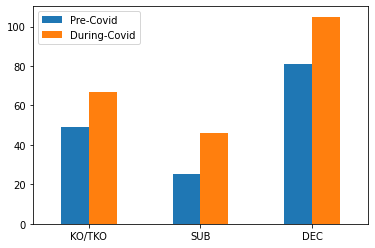

In [44]:
df = pd.DataFrame({'Pre-Covid': pre_covid,'During-Covid': during_covid}, index=X_axis)
ax = df.plot.bar(rot=0)


In [ ]:
df.groupby(['']).sum().plot(kind='pie', y='SALES')

create a pie chart for the difference between before and during covid for the 3 methods

In [ ]:
#Pie Chart 
df = pd.DataFrame({{'Pre-Covid': pre_covid,'During-Covid': during_covid}, index=X_axis},
                  index=['KO/TKO', 'SUB', 'DEC'])
plot = df.plot.pie(y='', figsize=(5, 5))